In [ ]:
!git clone https://github.com/autogyro/yolo-V8.git
!pip install ultralytics

Cloning into 'yolo-V8'...
remote: Enumerating objects: 2723, done.
remote: Total 2723 (delta 0), reused 0 (delta 0), pack-reused 2723 (from 1)
Receiving objects: 100% (2723/2723), 1.41 MiB | 17.40 MiB/s, done.
Resolving deltas: 100% (1855/1855), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 23.2 MB/s eta 0:00:00


In [ ]:
!pip install -r '/content/yolo-V8/requirements.txt'

In [ ]:
import os

# 생성할 폴더 경로 설정
folder_path = '/content/yolo-V8/images'

# 폴더 생성
os.makedirs(folder_path, exist_ok=True)
print(f"{folder_path} 폴더가 생성되었습니다.")


/content/yolo-V8/images 폴더가 생성되었습니다.


In [ ]:
import os

# 생성할 폴더 경로 설정
folder_path = '/content/yolo-V8/labels'

# 폴더 생성
os.makedirs(folder_path, exist_ok=True)
print(f"{folder_path} 폴더가 생성되었습니다.")


/content/yolo-V8/labels 폴더가 생성되었습니다.


In [ ]:
!unzip /content/drive/MyDrive/done.zip

Archive:  /content/drive/MyDrive/done.zip
   creating: train/
   creating: train/images/
  inflating: train/images/m0006.jpg  
  inflating: train/images/m0007.jpg  
  inflating: train/images/m0012.jpg  
  inflating: train/images/m0015.jpg  
  inflating: train/images/m0016.jpg  
  inflating: train/images/m0018.jpg  
  inflating: train/images/m0023.jpg  
  inflating: train/images/m0048.jpg  
  inflating: train/images/m0059.jpg  
  inflating: train/images/m0069.jpg  
  inflating: train/images/m0070.jpg  
  inflating: train/images/m0071.jpg  
  inflating: train/images/m0080.jpg  
  inflating: train/images/m0090.jpg  
  inflating: train/images/m0091.jpg  
  inflating: train/images/m0093.jpg  
  inflating: train/images/m0103.jpg  
  inflating: train/images/m0110.jpg  
  inflating: train/images/m0114.jpg  
  inflating: train/images/m0122.jpg  
  inflating: train/images/m0135.jpg  
  inflating: train/images/m0139.jpg  
  inflating: train/images/m0155.jpg  
  inflating: train/images/m0199.jpg  

In [ ]:
import os

# 생성할 폴더 경로 설정
folder_path = '/content/yolo-V8/images/train'

# 폴더 생성
os.makedirs(folder_path, exist_ok=True)
print(f"{folder_path} 폴더가 생성되었습니다.")
import os

# 생성할 폴더 경로 설정
folder_path = '/content/yolo-V8/images/val'

# 폴더 생성
os.makedirs(folder_path, exist_ok=True)
print(f"{folder_path} 폴더가 생성되었습니다.")


/content/yolo-V8/images/train 폴더가 생성되었습니다.
/content/yolo-V8/images/val 폴더가 생성되었습니다.


In [ ]:
!mv /content/train/images/* /content/yolo-V8/images/train/

In [ ]:
!mv /content/val/images/* /content/yolo-V8/images/val/

In [ ]:
import os

# 생성할 폴더 경로 설정
folder_path = '/content/yolo-V8/labels/train'

# 폴더 생성
os.makedirs(folder_path, exist_ok=True)
print(f"{folder_path} 폴더가 생성되었습니다.")
import os

# 생성할 폴더 경로 설정
folder_path = '/content/yolo-V8/labels/val'

# 폴더 생성
os.makedirs(folder_path, exist_ok=True)
print(f"{folder_path} 폴더가 생성되었습니다.")


/content/yolo-V8/labels/train 폴더가 생성되었습니다.
/content/yolo-V8/labels/val 폴더가 생성되었습니다.


In [ ]:
!mv /content/train/labels/* /content/yolo-V8/labels/train/
!mv /content/val/labels/* /content/yolo-V8/labels/val/


In [ ]:
# data.yaml 파일을 작성하여 수정된 데이터셋 경로와 클래스 이름을 정의합니다.
yaml_content = """
path: /content/yolo-V8
train: /content/yolo-V8/images/train
val: /content/yolo-V8/images/val

names:
  0: bike_stand
  1: bike_lie
  2: crosswalk
  3: braille_block
  4: traffic_island
  5: protection_area
  6: bike_road
  7: car_road
"""

# yaml 파일 생성
with open('/content/yolo-V8/data.yaml', 'w') as f:
    f.write(yaml_content)

In [ ]:
from ultralytics import YOLO

# YOLOv8 모델 초기화
model = YOLO('/content/drive/MyDrive/best_4.pt')  # 더 큰 YOLOv8 모델의 사전 학습된 가중치로 초기화

# 모델 학습 시작
model.train(
    data='/content/yolo-V8/data.yaml',   # 수정된 data.yaml 파일 경로
    epochs=100,                          # 학습 반복 횟수
    imgsz=640,                           # 입력 이미지 크기
    batch=16,                            # 배치 크기
    lr0=0.001,                           # 초기 학습률
    lrf=0.01,                            # 최종 학습률 비율
    momentum=0.937,                      # 모멘텀
    weight_decay=0.0005,                 # 가중치 감쇠
    augment=True,                        # 데이터 증강 활성화
    optimizer='Adam',                    # 옵티마이저 설정 (SGD 또는 Adam)
    patience=15,                         # 조기 종료를 위한 인내 에폭 설정
    save_period=5                        # 매 5 에폭마다 모델 저장
)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/best_4.pt, data=/content/yolo-V8/data.yaml, epochs=100, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

train: Scanning /content/yolo-V8/labels/train.cache... 57 images, 0 backgrounds, 0 corrupt: 100%|██████████| 57/57 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/yolo-V8/labels/val.cache... 13 images, 2 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]


Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.72G      1.301      5.068      3.016      1.703         32        640: 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         15         19      0.727      0.744       0.73      0.505      0.727      0.744       0.72      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.66G      1.212      3.951      2.426      1.702         29        640: 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         15         19      0.382      0.917      0.677      0.544      0.481      0.632      0.399      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.16G      1.077      2.642      1.243      1.482         34        640: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         15         19      0.604       0.25      0.267      0.177          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.85G      1.031      2.268     0.9367      1.451         30        640: 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         15         19      0.662      0.156      0.162     0.0799   0.000218     0.0625   0.000179   4.74e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.21G     0.9165      2.136      1.006      1.333         29        640: 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         15         19      0.648      0.137      0.194      0.107      0.586     0.0625     0.0717      0.028



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.96G     0.8955      1.865     0.8876      1.328         31        640: 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         15         19      0.924      0.216      0.283      0.144      0.924      0.216      0.246      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.97G     0.8817      2.012     0.9391      1.312         35        640: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         15         19      0.922      0.219      0.316      0.193      0.922      0.219       0.26      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.95G     0.8086      1.847     0.8755      1.252         34        640: 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         15         19      0.962      0.219      0.321      0.209      0.935      0.188      0.253       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.96G     0.8648      1.746     0.8265      1.269         31        640: 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         15         19      0.967      0.247      0.324      0.178      0.902      0.184      0.191      0.097



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.97G     0.7647      1.566     0.7922      1.212         26        640: 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         15         19      0.902      0.302       0.49      0.337       0.78      0.212      0.241       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.01G     0.8455      1.781     0.7987      1.269         33        640: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         15         19      0.833      0.557       0.63      0.398      0.475      0.247      0.223      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.96G     0.8197      1.603     0.7906      1.241         19        640: 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         15         19      0.879      0.608      0.667      0.393      0.735      0.125      0.134     0.0788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.96G     0.6766      1.482     0.6399      1.133         31        640: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         15         19      0.812      0.642      0.679      0.365      0.824      0.242      0.245      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.98G     0.7897       1.47     0.6876      1.222         31        640: 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         15         19      0.857      0.417       0.49      0.324      0.822      0.247      0.242      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.98G      0.759      1.385     0.7064      1.173         39        640: 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         15         19      0.851      0.411      0.481      0.338      0.775      0.247      0.285      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.84G     0.6917      1.426     0.6645       1.16         32        640: 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         15         19       0.87      0.414       0.47       0.34      0.812      0.243      0.318      0.192
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



16 epochs completed in 0.022 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 54.8MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,227,016 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]


                   all         15         19      0.727      0.744       0.73      0.505      0.727      0.744      0.719      0.236
            bike_stand          6          9      0.534      0.667       0.67      0.525      0.534      0.667      0.627      0.254
              bike_lie          1          1      0.911          1      0.995      0.497      0.911          1      0.995     0.0995
         braille_block          1          1      0.461          1      0.497      0.448      0.461          1      0.497      0.149
             bike_road          8          8          1      0.309      0.756      0.549          1      0.309      0.756      0.442
Speed: 0.2ms preprocess, 16.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/segment/train3


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 3, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x782720230e50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0


WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 1/1 /content/test_img.PNG: 384x640 1 bike_stand, 1 bike_lie, 11 crosswalks, 2 braille_blocks, 1 car_road, 49.2ms
Speed: 2.3ms preprocess, 49.2ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/train33


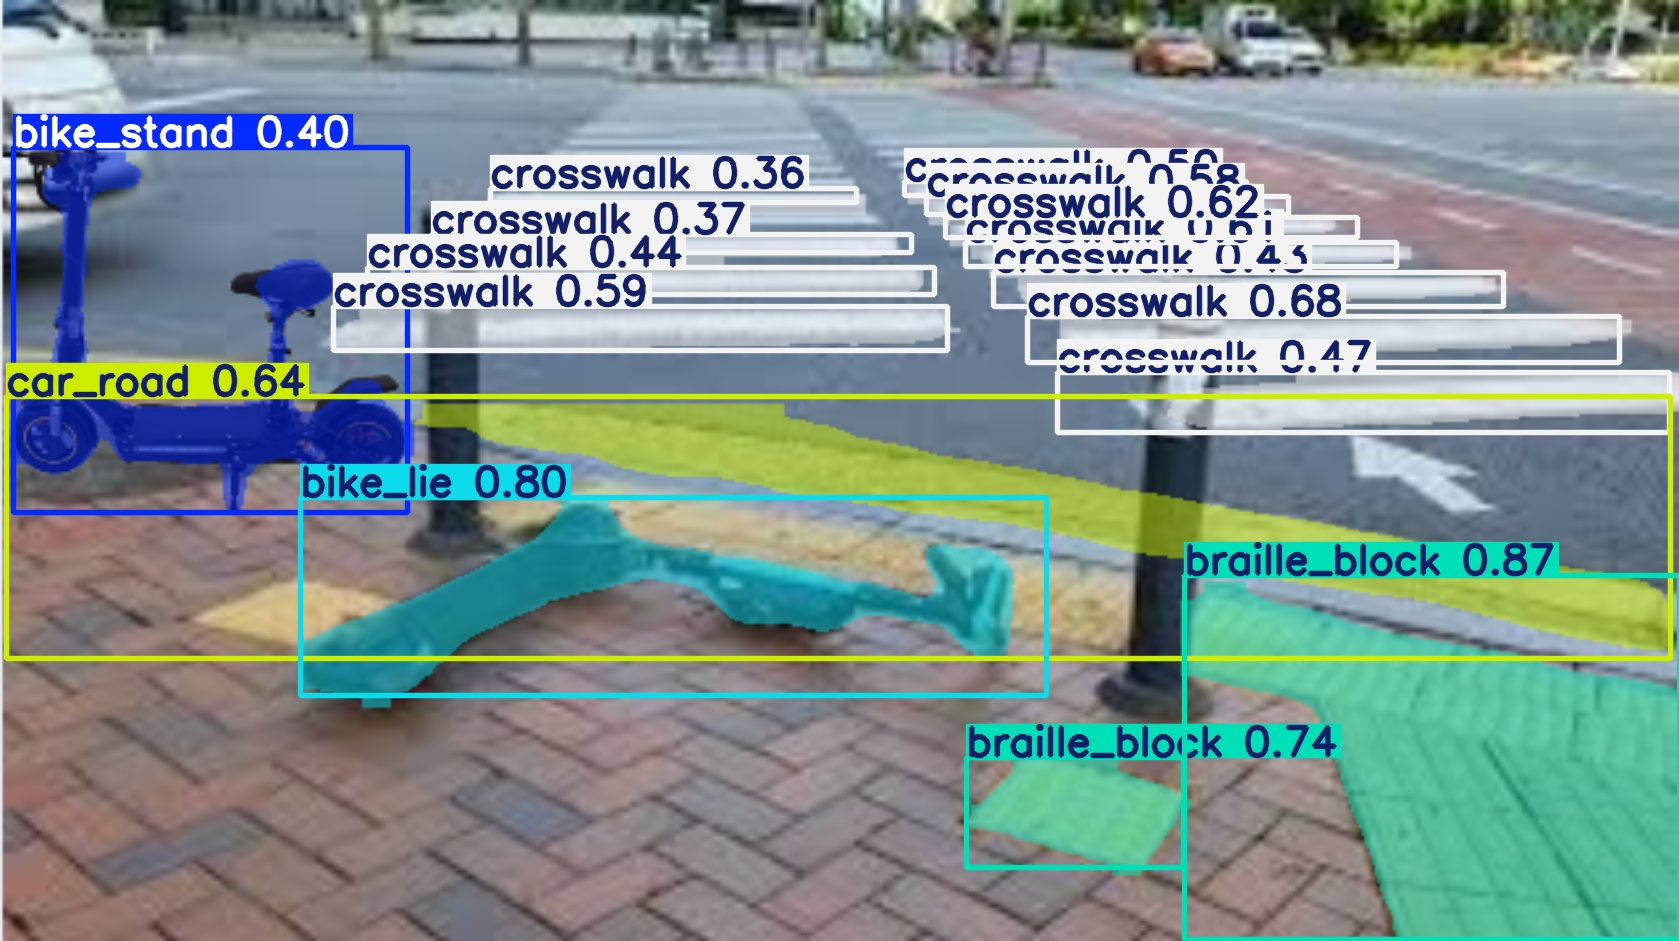

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display

# 2. 객체 탐지 수행
# 탐지를 수행할 이미지 경로를 설정합니다.
new_image_path = '/content/test_img.PNG'  # 테스트할 이미지 경로를 지정

# 예측 수행
results = model.predict(source=new_image_path, save=True)

# 3. 예측 결과 출력
# 예측 결과 이미지를 저장한 폴더에서 불러와 표시합니다.
# YOLOv8은 기본적으로 예측된 이미지를 `/content/runs/predict` 폴더에 저장합니다.
predicted_image_path = '/content/runs/segment/train32/test_img.jpg'  # 실제 경로는 실행 후 확인 필요

# 예측 결과 이미지 표시
display(Image(filename=predicted_image_path))